## Linear Models

`Linear models are a class of models that are widely used in practice and have been
studied extensively in the last few decades, with roots going back over a hundred
years. Linear models make a prediction using a linear function of the input features
and our goal is to fins the best straight lines that fits the data point
For regression, the general prediction formula for a linear model looks as follows:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w (model weights) and b (bias term) are parameters of the model that are learned, and ŷ is
the prediction the model makes.
`

<img src='../../../images/lr.png'>

 ## How linear regression algrithm works
 
<img src='../../../images/IMG_20200414_003459.jpg'>
 
<img src='../../../images/IMG_20200414_004430.jpg'>
 
<img src='../../../images/IMG_20200414_003933.jpg'>
 
<img src='../../../images/IMG_20200414_004140.jpg'>

## Gradient Descent

<img src='../../../images/g1.jpg'>

<img src='../../../images/g2.jpg'>

<img src='../../../images/g3.jpg'>

`gradient descent algorithm`

<img src='../../../images/gd.png'>

`for MSE loss function GD equation :`

<img src='../../../images/gdlr.png'>

`check this animation for GD to imagine how it works`

<img src='../../../images/sgd.gif'>

### Learning Rate efffect
`
we note that fitted line is not the best , for linear regression chaging training steps and learning rate may change the performance
`
<img src='../../../images/slr.png'>

<img src='../../../images/biglr.png'>

## linear regression in sklearn

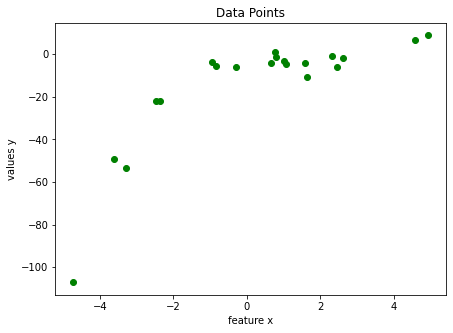

In [75]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.figure(figsize=(7,5))
plt.scatter(x,y,c='g')
plt.title('Data Points')
plt.xlabel('feature x')
plt.ylabel('values y')
plt.show()
x=x.reshape(-1,1)

In [94]:
# import linear regression module from sklearn
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(verbose=1) # new regressor object from SGDRegressor() class
model.fit(x,y) # fit >>> start training to find best params

-- Epoch 1
Norm: 4.78, NNZs: 1, Bias: -2.317171, T: 20, Avg. loss: 387.869674
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.82, NNZs: 1, Bias: -3.541504, T: 40, Avg. loss: 258.176105
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.40, NNZs: 1, Bias: -4.511417, T: 60, Avg. loss: 231.232114
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.85, NNZs: 1, Bias: -5.323732, T: 80, Avg. loss: 214.246052
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.00, NNZs: 1, Bias: -6.047138, T: 100, Avg. loss: 200.922443
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.12, NNZs: 1, Bias: -6.698035, T: 120, Avg. loss: 192.053377
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.20, NNZs: 1, Bias: -7.277312, T: 140, Avg. loss: 185.131001
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 7.31, NNZs: 1, Bias: -7.808713, T: 160, Avg. loss: 179.188712
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 7.34, NNZs: 1, Bias: -8.290368, T: 180, Avg. loss: 173.383003
Total trainin

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [53]:
# show model coefs
print("theta_0",model.intercept_)
print("theta_1",model.coef_)

theta_0 [-16.56723334]
theta_1 [8.24472348]


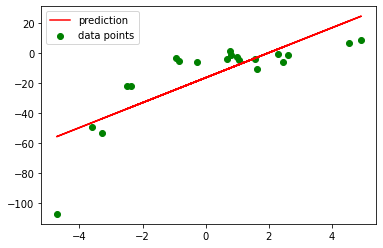

In [87]:
# plot model predictions vs actual values
y_pred=model.predict(x)
plt.scatter(x,y,label='data points',color='g')
plt.plot(x,y_pred,color='r',label='prediction')
plt.legend() # show legend
plt.show()

In [83]:
# to evaluate linear regression model we may need to compute MSE error
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_true=y,y_pred=y_pred)
print("MSE error for this model",error)

MSE error for this model 253.13331255362203


### feature engineering , how to develop good linear model

`in previous model , we note that it is suffering from an underfitting problem where straight line is not enough to learn from the data, to solve this we may need`
`to increase model complexity (increase model features)`

<img src='../../../images/lr_poly.png'>

In [92]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2,include_bias=False)
x_poly = polynomial_features.fit_transform(x) # check https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [93]:
# check new features
x_poly

array([[-3.29215704, 10.83829796],
       [ 0.79952837,  0.63924562],
       [-0.93621395,  0.87649656],
       [-4.7226796 , 22.30370258],
       [-3.60267397, 12.97925974],
       [ 4.93183364, 24.32298305],
       [-0.85026525,  0.722951  ],
       [ 2.45407162,  6.02246754],
       [ 2.30965656,  5.3345134 ],
       [ 0.76820449,  0.59013814],
       [ 1.56786929,  2.4582141 ],
       [-2.36282052,  5.58292081],
       [-0.28311318,  0.08015307],
       [ 1.63497495,  2.67314309],
       [ 0.6684103 ,  0.44677233],
       [ 0.99897702,  0.99795508],
       [-2.48223722,  6.16150161],
       [ 2.61547479,  6.84070838],
       [ 1.0607969 ,  1.12529005],
       [ 4.56228722, 20.81446466]])

In [95]:
model2=SGDRegressor(verbose=1)
model2.fit(x_poly,y)

-- Epoch 1
Norm: 8.55, NNZs: 2, Bias: 0.331560, T: 20, Avg. loss: 7152.014389
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.88, NNZs: 2, Bias: -1.413753, T: 40, Avg. loss: 8899.636525
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.04, NNZs: 2, Bias: -1.726467, T: 60, Avg. loss: 128.442223
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.31, NNZs: 2, Bias: -2.006758, T: 80, Avg. loss: 60.803201
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 8.89, NNZs: 2, Bias: -2.060748, T: 100, Avg. loss: 153.918865
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.22, NNZs: 2, Bias: -2.054527, T: 120, Avg. loss: 178.322511
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.54, NNZs: 2, Bias: -2.247960, T: 140, Avg. loss: 75.705856
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 8.42, NNZs: 2, Bias: -2.330087, T: 160, Avg. loss: 63.376894
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 8.59, NNZs: 2, Bias: -2.461246, T: 180, Avg. loss: 90.149258
Total training t

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [97]:
# show model coefs
print("theta_0",model2.intercept_)
print("theta_1",model2.coef_)

theta_0 [-2.46124631]
theta_1 [ 8.43941184 -1.6216697 ]


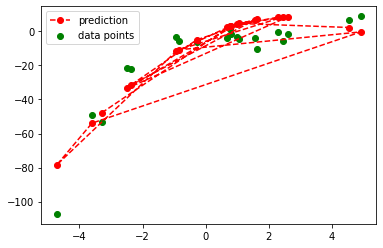

In [138]:
# plot model2 predictions vs actual values
y_pred2=model2.predict(x_poly)
plt.scatter(x,y,label='data points',color='g')
plt.plot(x,y_pred2,linestyle='--', marker='o',color='r',label='prediction')
plt.legend() # show legend
plt.show()